<a href="https://colab.research.google.com/github/wassimchouchen/Natural-Language-Processing/blob/main/Gradio_Tutorial_ODSC_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction to `gradio`


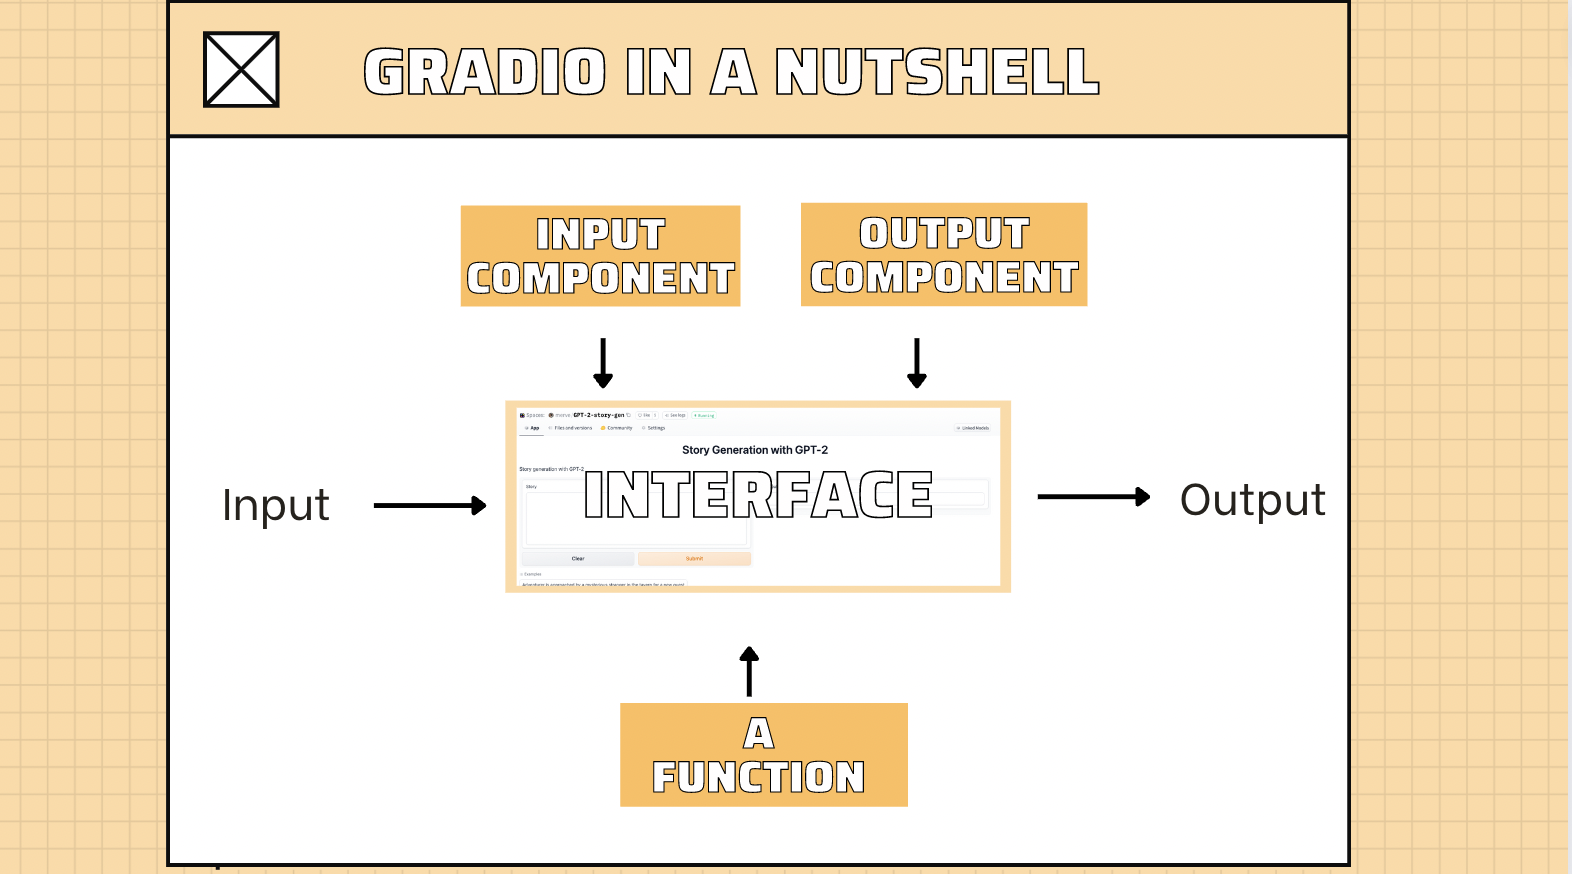

`gradio` is a handy Python library that lets you build web demos simply by specifying the list of input and output **components** expected by your machine learning model. 

What do I mean by input and output components? Gradio comes with a bunch of predefined components for different kinds of machine learning models. Here are some examples:

* For an **image classifier**, the expected input type is an `Image` and the output type is a `Label`. 
* For a **speech recognition model**, the expected input component is an `Microphone` (which lets users record from the browser) or `Audio` (which lets users drag-and-drop audio files), while the output type is `Text`. 
* For a **question answering model**, we expect **2 inputs**: [`Text`, `Text`], one textbox for the paragraph and one for the question, and the output type is a single `Text` corresponding to the answer. 

You get the idea... (for all of the supported components, [see the docs](https://gradio.app/docs/))

In addition to the input and output types, Gradio expects a third parameter, which is the prediction function itself. This parameter can be ***any* regular Python function** that takes in parameter(s) corresponding to the input component(s) and returns value(s) corresponding to the output component(s)

Enough words. Let's see some code!

In [ ]:
# First, install Gradio
!pip install --quiet gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.2 MB/s eta 0:0

## Introduction to Interface

### Image Classification Example

In [ ]:
import gradio as gr

In [ ]:
def classify_image(image):
    return {"dog": 0.9, "cat": 0.1}

# Write 1 line of Python to create a simple GUI
gr.Interface(
    fn=classify_image, 
    inputs="image", 
    outputs="label",
).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### Key Takeaways
A `gr.Interface` can take a python function and turn it into a web page in one line of code. 

There are 3 ingredients needed to create a `gr.Interface`:
1. A function
2. Input component(s)  <- use the string shortcut or the Component object
3. Output component(s)  <- use the string shortcut or the Component object



## Using component classes
You can also customize the components, for example add a descriptive label to the image and change its size, by instantiating the component and passing the appropriate parameters.

In [ ]:
demo = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(label="Dog or Cat Image"),
    outputs=gr.Label(),
)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Some more about parameters in `Interface`:
* `title`: adds a title to the top of the UI
* `description`: adds a description underneath the title (supports Markdown, HTML)
* `inputs` can be a list of input types, that are mapped to the function parameters
* `outputs` can be a list of output types, which are mapped to a function's return values

In [ ]:
demo = gr.Interface(
    fn=classify_image,
    inputs=[gr.Image(label="Dog or Cat Image")],
    outputs=[gr.Label()],
    title="Dog vs Cat Classifier",
    description="Classifiy an image as a dog or a cat with a cutting edge computer vision model",
)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

## Authentication

You can control who has access to your gradio application by adding authentication.

The `auth` parameter of `.launch` accepts either a list of `(username, password)` tuples or a function that takes a `username` and `password` and returns `True` if its a valid login.

In [ ]:
def authenticate(username, password):
  return username == "admin" and password == "admin"

demo = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(label="Dog or Cat Image"),
    outputs=gr.Label(),
    title="Dog vs Cat Classifier",
    description="Classifiy an image as a dog or a cat with a cutting edge computer vision model",
)
demo.launch(auth=authenticate, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b60c5687e9663d03d9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


### Key Takeaways
- The `auth` parameter lets you control who can access your application.
- Using `share=True` will create an link that anyone can access, that's the `gradio.live` printed above. This link will live for 72 hours. We explore longer term hosting at the end of the workshop.
- Google Colab does not let us launch an interface with auth without `share=True`. That's not true if you run this demo locally on your machine.


## Example Inputs

You can also pass `examples` to prepopulate the inputs of the interface. This helps users know how to use your app!

In [ ]:
import gradio as gr

def calculator(num1, operation, num2):
    if operation == "add":
        return num1 + num2
    elif operation == "subtract":
        return num1 - num2
    elif operation == "multiply":
        return num1 * num2
    elif operation == "divide":
        return num1 / num2


demo = gr.Interface(
    fn=calculator,
    inputs=[
            gr.Number(value=4), 
            gr.Radio(["add", "subtract", "multiply", "divide"]), 
            "number"
            ],
    outputs=gr.Number(),
    examples=[
        [5, "add", 3],
        [4, "divide", 2],
        [-4, "multiply", 2.5],
        [0, "subtract", 1.2],
    ],
)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### Key Takeaways
- Interfaces can also specify more than one input or output component

## Custom Theming

In [ ]:
XKCD = "gstaff/xkcd"
SMALL = "JohnSmith9982/small_and_pretty"
SEAFOAM = "gradio/seafoam"


demo = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(label="Dog or Cat Image"),
    outputs=gr.Label(),
    title="Dog vs Cat Classifier",
    description="Classifiy an image as a dog or a cat with a cutting edge computer vision model",
    theme=SEAFOAM
)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### Theme Discovery
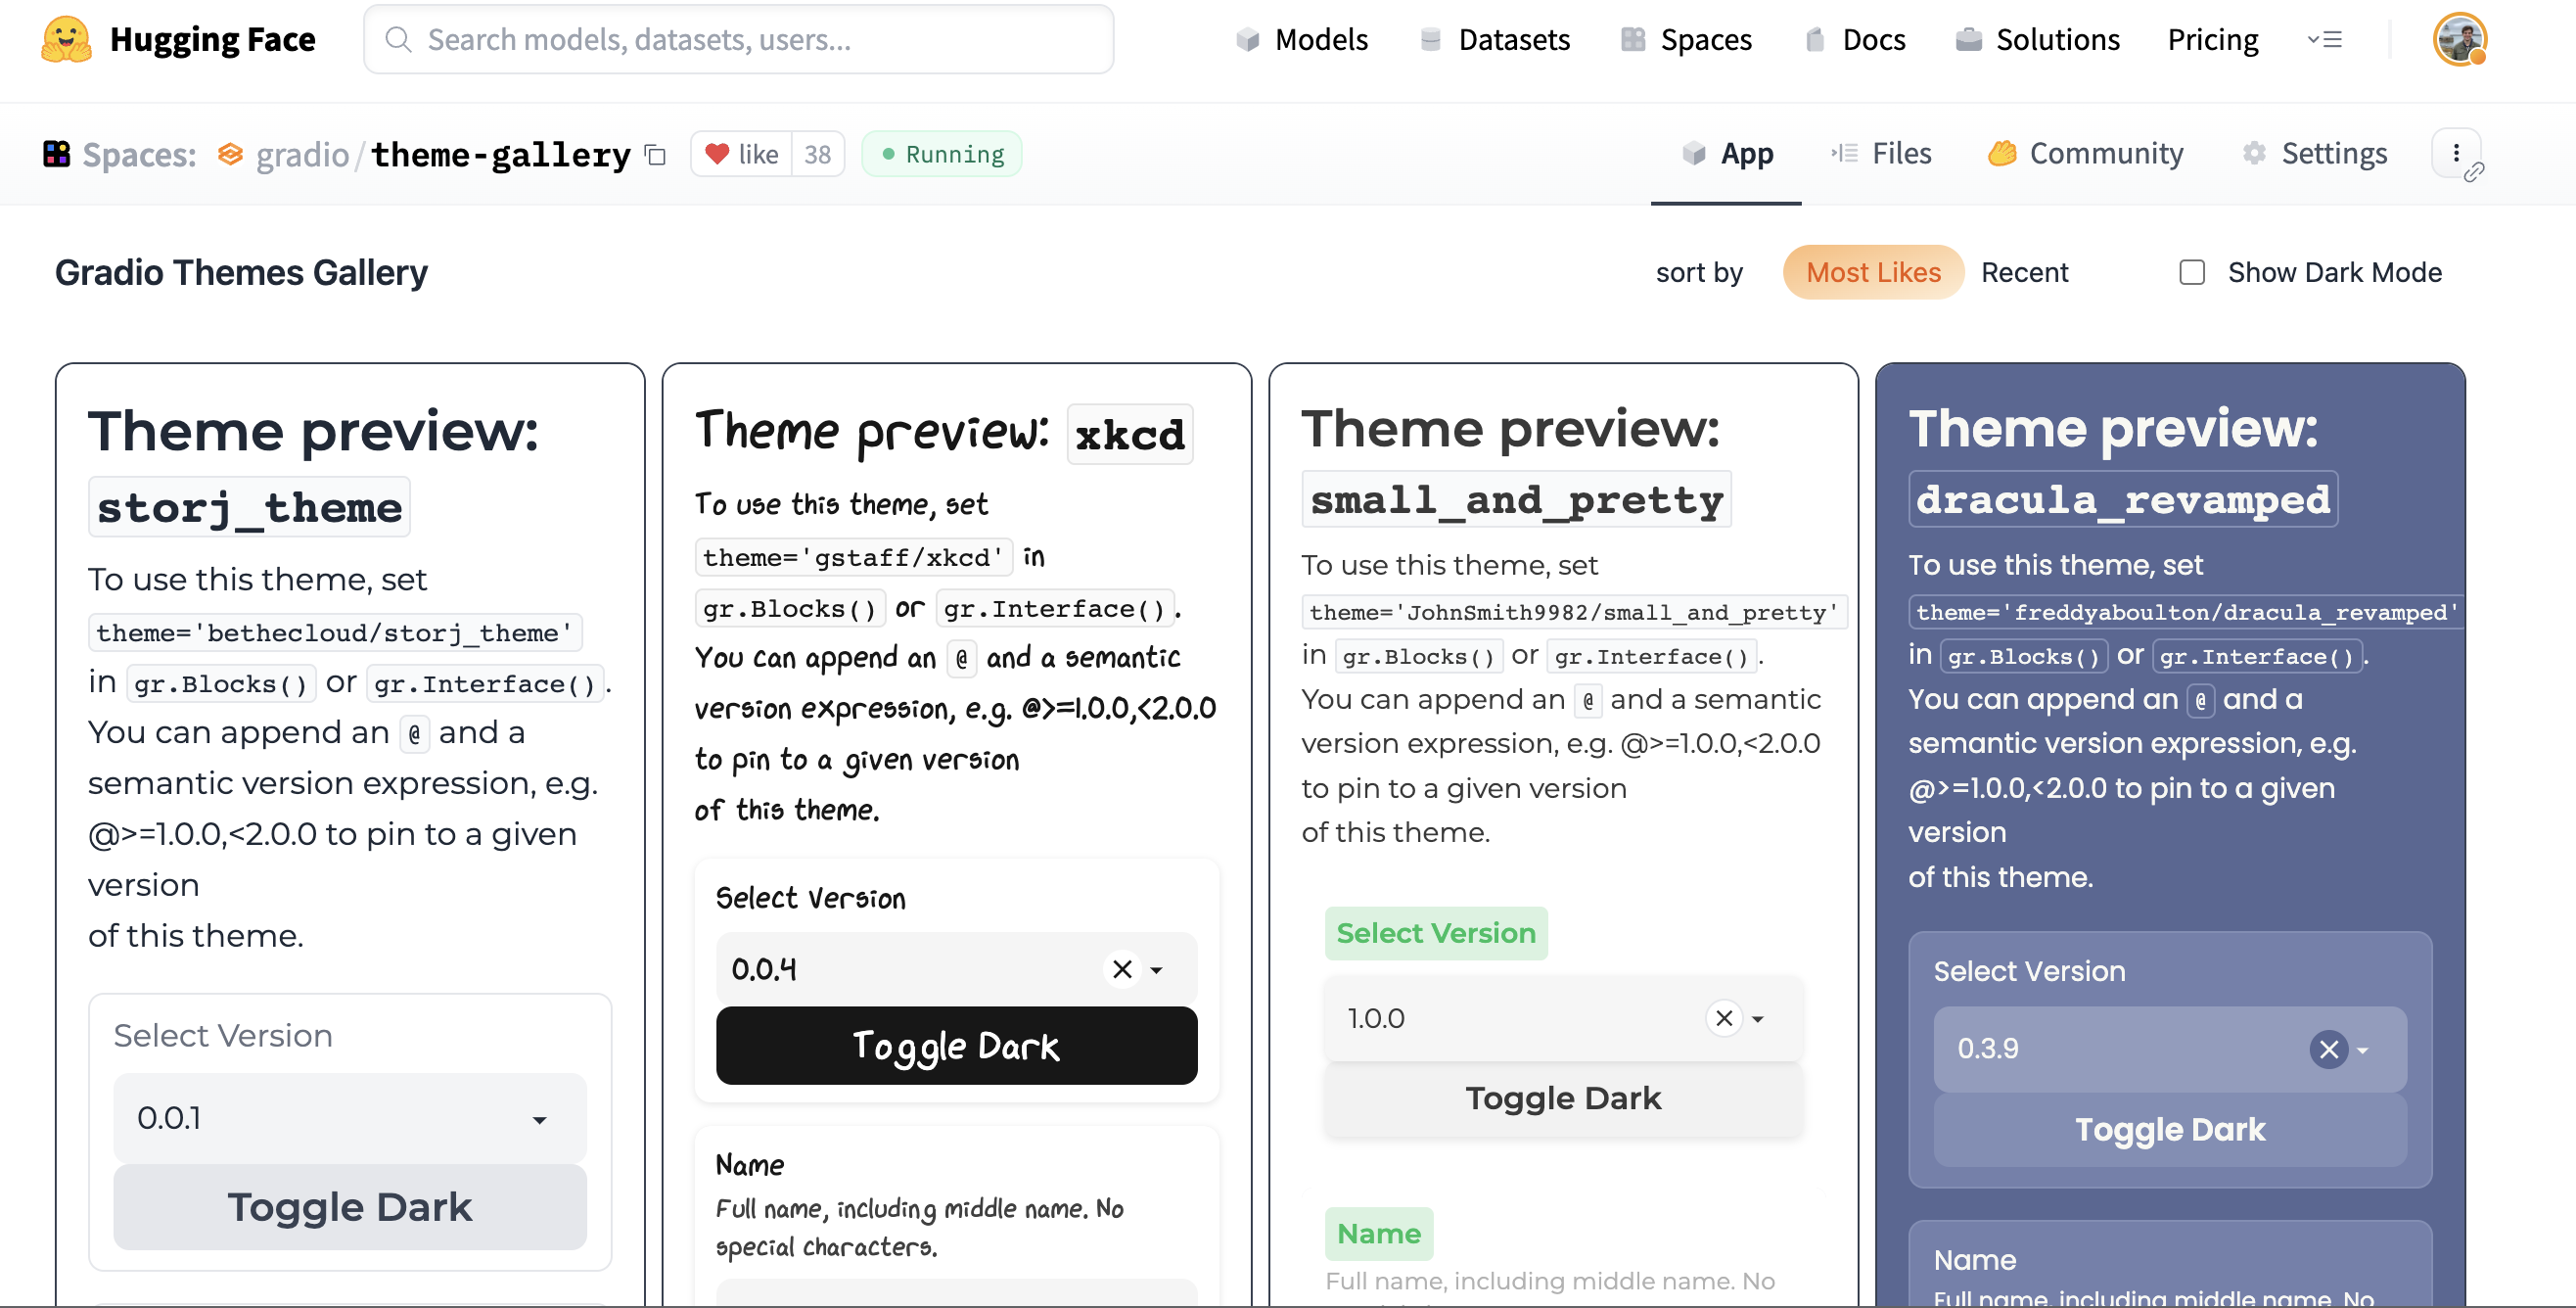

Visit the [Theme Gallery](https://huggingface.co/spaces/gradio/theme-gallery) to see other community contributed themes!

If you'd like to create your own theme, read the [theming guide](https://gradio.app/theming-guide/)

### Key Takeaways
- Browse the theme gallery to find a theme you like and pass its name to the `theme` argument of the Interface.
- You can also create your own theme! Read the guide and use the interactive theme builder:

```python
import gradio as gr

gr.themes.builder()
```

## More Demos and Inspiration

There are a lot more examples you can try in Gradio's [getting started page](https://gradio.app/getting_started/).

# Introduction to Blocks

The Interface API is very convenient but in some cases may not be sufficiently flexible for your needs. For example, you might want to:

* Group together related demos as multiple tabs in one web app
* Change the layout of your demo instead of just having all of the inputs on the left and outputs on the right
* Have multi-step interfaces, in which the output of one model becomes the input to the next model, or have more flexible data flows in general
* Change a component's properties (for example, the choices in a Dropdown) or its visibilty based on user input

These are all use cases where you should use the Blocks API!


In [ ]:

def classify_image(image):
    return {"dog": 0.9, "cat": 0.1}

with gr.Blocks() as demo:
    gr.Markdown(
    """
    # Dog vs Cat Classifier
    Upload an image to detect if its of a dog or cat
    """)
    with gr.Row():
      with gr.Column():
        with gr.Row():
          inp = gr.Image(label="Dog or Cat Image")
        with gr.Row():
          clear_btn = gr.Button(value="Clear")
          btn = gr.Button(value="Classify", variant="primary")
      with gr.Column():
        out = gr.Label(label="Classification")

    btn.click(fn=classify_image, 
               inputs=inp, 
               outputs=out)
    clear_btn.click(fn=lambda: [None, None],
                inputs=None,
                outputs=[inp, out])

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Key Takeaways:

1. Blocks allow you to build web applications that combine markdown, HTML, buttons, and interactive components simply by instantiating objects in Python inside of a `with gradio.Blocks()` context. The order in which you instantiate components matters as each element gets rendered into the web app in the order it was created. (More complex layouts are discussed below)

2. You can define regular Python functions anywhere in your code and run them with user input using Blocks. In our example, we have a simple function that adds a welcome message before a user's name, but you can write any Python function, from a simple calculation to large machine learning model's inference.

3. You can assign events to any Blocks component. This will run your function when the component is clicked/changed/etc. When you assign an event, you pass in three parameters: `fn`: the function that should be called, `inputs`: the (list) of input component(s), and `outputs`: the (list) of output components that should be called.

4. Blocks automatically figures out whether a component should be interactive (accept user input) or not, based on the event triggers you define. In our example, the first textbox is interactive, since its value is used by the `greet()` function. The second textbox is not interactive, since its value is never used as an input. In some cases, you might want to override this, which you can do by passing the appropriate boolean to `interactive`, a parameter that every component accepts.

5. You can write and launch() your Blocks anywhere: jupyter notebooks, colab notebooks, or regular Python IDEs since Gradio uses the standard Python interpreter.

# Controlling the Layout With Blocks

We already saw how to place components in different columns and rows with `gr.Column()` and `gr.Row()`

Now we will learn about `gr.Tabs()`

In [ ]:
import numpy as np
import gradio as gr

demo = gr.Blocks()

def flip_text(x):
    return x[::-1]

def flip_image(x):
    return np.fliplr(x)

with demo:
    gr.Markdown("Flip text or image files using this demo.")
    with gr.Tabs():
        with gr.TabItem("Flip Text"):
            text_input = gr.Textbox()
            text_output = gr.Textbox()
            text_button = gr.Button("Flip")
        with gr.TabItem("Flip Image"):
            with gr.Row():
                image_input = gr.Image()
                image_output = gr.Image()
            image_button = gr.Button("Flip")

    text_button.click(flip_text, inputs=text_input, outputs=text_output)
    image_button.click(flip_image, inputs=image_input, outputs=image_output)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

# Updating the Properties Of A Component


In [ ]:
import gradio as gr

def change_textbox(choice):
    if choice == "short":
        return gr.Textbox.update(lines=2, visible=True)
    elif choice == "long":
        return gr.Textbox.update(lines=8, visible=True)
    else:
        return gr.Textbox.update(visible=False)

with gr.Blocks() as demo:
    radio = gr.Radio(
        ["short", "long", "none"], label="What kind of essay would you like to write?"
    )
    text = gr.Textbox(lines=2, interactive=True)

    radio.change(fn=change_textbox, inputs=radio, outputs=text)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

# Supported events

In the last two examples, we have seen the `click` event on a button and the `change` event on a radio.

Each gradio component supports its own set of events.

The [Gradio Docs](https://gradio.app/docs/#components) have the API reference for each component, including its supported events. 

Let's take a quick look!

# Storing State

Sometimes you may want to save a piece of information created by an event to use in another event or component.

Let's see an example where we keep track of which 

In [ ]:
import random
import requests

word_site = "https://www.mit.edu/~ecprice/wordlist.10000"

response = requests.get(word_site)
WORDS = response.text.splitlines()

def generate_word():
    return random.choice(WORDS)
  
def record_state(state, word, like=True):
    if like:
        state['like'].append(word)
    else:
        state['dislike'].append(word)
    return state, state

state = {"like": [], "dislike": []}

with gr.Blocks() as demo:
    state = gr.State({"like": [], "dislike": []})
    with gr.Row():
      word = gr.Textbox()
    with gr.Row():
      with gr.Column():
        dislike = gr.Button(value="👎")
      with gr.Column():
        generate = gr.Button(value="New Word")
      with gr.Column():
        like = gr.Button(value="👍")
    with gr.Row():
      history = gr.JSON()

    
    generate.click(generate_word, outputs=[word])
    like.click(lambda state, word: record_state(state, word, True),
               inputs=[state, word],
               outputs=[state, history])
    dislike.click(lambda state, word: record_state(state, word, False),
               inputs=[state, word],
               outputs=[state, history])
    
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### Key Takeaways
- It is tempting to use a `global` variable to store history or state, but this will not work well for concurrent users.
- gr.State will store the state per "session", aka each independent refresh of the webpage. 
- The State must be passed as input and output to an event handler if you intend to modify it.



# Example: Iterative Outputs

By `yield`in from your function, you can "send" an output to the UI before the function starts running.

In [ ]:
import time
import gradio as gr

def count_to_n(n):
  for i in range(n):
    yield i
    time.sleep(0.5)

gr.Interface(count_to_n, 
             gr.Slider(value=3, minimum=1, maximum=10),
             gr.Number()).queue().launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f378f9d51b24992e1d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


What does `.queue()` do?

- Every gradio app can start a `queue` to process incoming requests.
- Queuing allows the backend to send multiple outputs per function to the frontend. 
- Additionally, queueing allows you to control the number of requests processed concurrently by your application. For example, `.queue(concurrency_count=3)` means only three predictions will be handled concurrently.

For more information on queueing read the [guide](https://gradio.app/key-features/#queuing)

# Running events on a schedule

In the previous example, we saw that queuing allowed us to send an output from the same event every 0.5 seconds. 

We had to manually add a `time.sleep` line to our function to achieve this. Gradio can handle that for you with the `every` parameter.

In this example, we also show how to cancel, or stop, a running event.

In [ ]:
import datetime

with gr.Blocks() as demo:
  with gr.Row():
    current_time = gr.Textbox()
  with gr.Row():
    with gr.Column():
      start_clock = gr.Button("Start Clock")
    with gr.Column():
      stop_clock = gr.Button("Stop Clock")
  
  start = start_clock.click(lambda: datetime.datetime.now(), inputs=None, outputs=current_time, every=1)
  stop_clock.click(None, inputs=None, outputs=None, cancels=[start])

demo.queue().launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://644b40c65701f7aa9e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


# Example: Building a Dashboard!

We can take this concept further, and fetch data from a source every few seconds to get the most up to date view.

In this example, we use a google sheet but it can be any database or source. 

If you can write a python function to fetch your data, gradio can run it for you!


In [ ]:
import pandas as pd
import gradio as gr


URL = "https://docs.google.com/spreadsheets/d/1UC7Jsv-ebrmwdNjRd3xZRM3CPRZFRgTTSbtrAB--jOU/edit#gid=0"
csv_url = URL.replace('/edit#gid=', '/export?format=csv&gid=')

def get_data():
    return pd.read_csv(csv_url)


with gr.Blocks() as demo:
    gr.Markdown("# 📈 Real-Time Line Plot")
    with gr.Row():
        with gr.Column():
            gr.DataFrame(get_data, every=5)
        with gr.Column():
            gr.LinePlot(get_data, every=5, x="Date", y="Sales", y_title="Sales ($ millions)",
                        overlay_point=True)

demo.queue().launch(share=True)  # Run the demo with queuing enabled

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e3f7880f54ba4007ff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


### Key takeaways
- Use gradio to connect to any data source
- Gradio has a built-in plot components. Here we see `gr.LinePlot`, but `gr.ScatterPlot`, `gr.BarPLot` also exist.
- You don't have to use the custom plot components. Gradio supports displaying plots built with matplotlib, plotly, bokeh, and altari!

See this demos for an example:

- [outbreak_forecast](https://huggingface.co/spaces/gradio/outbreak_forecast)
- [bokeh_plot](https://huggingface.co/spaces/gradio/bokeh_plot)

# Chaining Events Together

In order to run an event right after another one completes, use the `then` method on the event constructor.
*italicized text*

In [ ]:
from PIL import Image
import time
import random
import datetime

def create_image(start):
    color = random.choice(['red', "green", "blue"])
    img = Image.new("RGB", (512, 512), color)
    time.sleep(random.random())
    end = datetime.datetime.now()
    return img, end, end - start


with gr.Blocks() as demo:
  state = gr.State()
  with gr.Row():
    with gr.Column():
      img = gr.Image()
    with gr.Column():
      start = gr.Textbox()
      end = gr.Textbox()
      duration = gr.Textbox()
  with gr.Row():
    create = gr.Button(value="Create Image")
  
  create.click(lambda: [datetime.datetime.now()]*2, outputs=[state, start]).\
         then(create_image, inputs=[state], outputs=[img, end, duration])

demo.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

## Key Takeaways
- You can also start an event only if the previous event succeeds with `.success`

# More information on Blocks

There are a lot more things that you can do with Blocks. Read more in our dedicated guide: www.gradio.app/introduction_to_blocks/

# Using Applications Programmatically

The `gradio_client` lets you connect to any gradio application running on the internet!

It comes pre-installed with `gradio`. Let's show how we can connect to an app running on the local network.

In [ ]:
def classify_image(image):
    return {"dog": 0.9, "cat": 0.1}

demo = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(label="Dog or Cat Image"),
    outputs=gr.Label(),
    title="Dog vs Cat Classifier",
    description="Classifiy an image as a dog or a cat with a cutting edge computer vision model",
)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### Step 1 - Create a `Client` instance by passing the url of the app

In [ ]:
import gradio_client as grc

client = grc.Client("http://localhost:7880/")

Loaded as API: http://localhost:7880/ ✔


### Step 2 - Use `view_api` to learn the data expected by the app

In [ ]:
client.view_api()

Client.predict() Usage Info
---------------------------
Named API endpoints: 1

 - predict(dog_or_cat_image, api_name="/predict") -> output
    Parameters:
     - [Image] dog_or_cat_image: str (filepath or URL to image) 
    Returns:
     - [Label] output: str (filepath to JSON file) 



### Step 3 - Use the `predict` method with the right data and api endpoint name



In [ ]:
pred = client.predict("https://gradio-builds.s3.amazonaws.com/diffusion_image/brown_dog.jpg", api_name="/predict")
print(pred)

/tmp/tmpj5lo1lc7.json


In [ ]:
!cat /tmp/tmpj5lo1lc7.json

{"label": "dog", "confidences": [{"label": "dog", "confidence": 0.9}, {"label": "cat", "confidence": 0.1}]}

### Let's use the stable diffusion space programmatically!

In [ ]:
client = grc.Client("stabilityai/stable-diffusion")

Loaded as API: https://stabilityai-stable-diffusion.hf.space ✔


In [ ]:
client.view_api()

Client.predict() Usage Info
---------------------------
Named API endpoints: 0

Unnamed API endpoints: 4

 - predict(parameter19, fn_index=0) -> (enter_your_prompt, enter_your_negative_prompt, guidance_scale)
    Parameters:
     - [Dataset] parameter19: str 
    Returns:
     - [Textbox] enter_your_prompt: str 
     - [Textbox] enter_your_negative_prompt: str 
     - [Slider] guidance_scale: int | float 

 - predict(enter_your_prompt, enter_your_negative_prompt, guidance_scale, fn_index=1) -> generated_images
    Parameters:
     - [Textbox] enter_your_prompt: str 
     - [Textbox] enter_your_negative_prompt: str 
     - [Slider] guidance_scale: int | float 
    Returns:
     - [Gallery] generated_images: str (path to directory with images and a file associating images with captions called captions.json) 

 - predict(enter_your_prompt, enter_your_negative_prompt, guidance_scale, fn_index=2) -> generated_images
    Parameters:
     - [Textbox] enter_your_prompt: str 
     - [Textbox] e

In [ ]:
pred = client.predict("A weiner dog riding a skateboard, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha",
                      "bad quality, low resolution",
                      9,
                      fn_index=1)

In [ ]:
pred

'/content/699de74d-a3c2-4231-ac99-338e640b61c2'

The `predict` method will block until the prediciton finishes.

The `submit` method will not block. This lets you launch multiple predictions concurrently and also check on the status of a running prediction. 

In [ ]:
job = client.submit("A weiner dog riding a skateboard, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha",
                      "bad quality, low resolution",
                      9,
                      fn_index=1)

while not  job.done():
  print(job.status())
  time.sleep(5)

StatusUpdate(code=<Status.STARTING: 'STARTING'>, rank=None, queue_size=None, eta=None, success=None, time=datetime.datetime(2023, 5, 9, 17, 57, 8, 847591), progress_data=None)


# Host a Demo on Hugging Face Spaces

Once you made a Gradio demo, you can host it permanently on Hugging Spaces very easily:

Here are the steps to that (shown in the GIF below):

A. First, create a Hugging Face account if you do not already have one, by visiting https://huggingface.co/ and clicking "Sign Up"

B. Once you are logged in, click on your profile picture and then click on "New Space" underneath it to get to this page: https://huggingface.co/new-space

C. Give your Space a name and a license. Select "Gradio" as the Space SDK, and then choose "Public" if you are fine with everyone accessing your Space and the underlying code

D. Then you will find a page that provides you instructions on how to upload your files into the Git repository for that Space. You may also need to add a `requirements.txt` file to specify any Python package dependencies.

E. Once you have pushed your files, that's it! Spaces will automatically build your Gradio demo allowing you to share it with anyone, anywhere!

![GIF](https://huggingface.co/blog/assets/28_gradio-spaces/spaces-demo-finalized.gif)





# Asking for Help

- Join the discord [server](https://discord.gg/hugging-face-879548962464493619)
- Ask question on the huggingface [forum](https://discuss.huggingface.co/)


## Extra: Using gradio from an LLM Agent

The `gradio-tools` library exposes popular spaces on HuggingFace as tools that can be use from an LLM Agent, such as those available in [langchain](https://python.langchain.com/en/latest/index.html).



In [ ]:
! pip install --quiet gradio-tools[langchain]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.0/782.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "Input Key Here"
from langchain.agents import initialize_agent
from langchain.llms import OpenAI
from gradio_tools.tools import SAMImageSegmentationTool

from langchain.memory import ConversationBufferMemory

llm = OpenAI(temperature=0)
memory = ConversationBufferMemory(memory_key="chat_history")
tools = [SAMImageSegmentationTool().langchain]

waldo_1 = "https://gradio-builds.s3.amazonaws.com/diffusion_image/waldo_3.webp"


agent = initialize_agent(tools, llm, memory=memory, agent="conversational-react-description", verbose=True)
output = agent.run(input=(f"Please find Waldo in this image: {waldo_1}. "
                          "He is a man with glasses wearing sweater with red and white stripes"))
print(output)



Loaded as API: https://curt-park-segment-anything-with-clip.hf.space ✔


> Entering new AgentExecutor chain...

Thought: Do I need to use a tool? Yes
Action: SAMImageSegmentation
Action Input: https://gradio-builds.s3.amazonaws.com/diffusion_image/waldo_3.webp|man with glasses wearing sweater with red and white stripes|0.9|0.8|0.85
Job Status: Status.STARTING eta: None

Observation: /tmp/tmpk541ydy1.png
Thought: Do I need to use a tool? No
AI: Here is the image with Waldo highlighted.

> Finished chain.
Here is the image with Waldo highlighted.
